In [40]:
%load_ext pypath_magic
%pypath -a ../src/
%pypath

The pypath_magic extension is already loaded. To reload it, use:
  %reload_ext pypath_magic


UsageError: u'/home/critechuser/StormS/src' is already in the user path.

In [7]:
%matplotlib notebook

In [8]:
import numpy as np
# -------------------------------------------------------------------------
# Const
# -------------------------------------------------------------------------
nm2m=1852. # 1 nautical mile to meters
kt2ms=nm2m/3600.  # knots to m/s
omega=2*np.pi/(3600.*24.) # angular speed omega=2pi*f(=frequency of earth : 1 cycle per day) 2pi* 1 / day in seconds
rhoa=1.15 #air density  Kg/m^3
radius=6378388 #137. # earth's radius according to WGS 84
deg2m=np.pi*radius/180.  # ds on cicle equals ds=r*dth - dth=pi/180
pn=101000.  # Atmospheric pressure [N/m^2] (101KPa - enviromental pressure)

tetaNE=45. #mean angle [degrees] of North Eastern quadrant
tetaNW=135. #        "              North Western
tetaSW=225. #        "              South West
tetaSE=315. #        "              South East

maxR=500.e3  # maximum radius of TC [m] (500Km)

In [9]:
from xmldic import bxml
import pandas
import matplotlib.pyplot as plt


In [10]:
def hvel(r):
    x=0.5+(r-rmaxh)/(maxR-rmaxh)*kh
    return (bh/rhoa*(rmaxh/r)**bh*dph*np.exp(-(rmaxh/r)**bh))**x

In [11]:
def pres(r):
    return pch+dph*np.exp(-(rmaxh/r)**bh)

In [12]:
def hvel2d(l1,l2,vtx,vty):
    r=np.sqrt(l1**2+l2**2)
    xh=0.5+(r-rmaxh)/(maxR-rmaxh)*kh
    ur=(bh/rhoa*(rmaxh/r)**bh*dph*np.exp(-(rmaxh/r)**bh))**xh
    theta=np.arctan2(l2,l1)
    ux=-ur*np.sin(theta)
    uxs=ux+vtx*(1.-np.exp(-(rmaxh/r)**bh))
    uy=ur*np.cos(theta)
    uys=uy+vty*(1.-np.exp(-(rmaxh/r)**bh))

    return ux,uy,uxs,uys,pres(r)

In [13]:
path='/mnt/web/cycloneSurgeVM/'

# ANALYSIS STARTS HERE

In [14]:
hurName='NAPARTAK'

In [15]:
sdir=path+'1000270/'

In [16]:
bul=16

In [17]:
infolder=sdir+'/{}'.format(bul)

In [18]:
infofile=infolder+'/info.xml'
info=bxml(infofile)
print info.setexp

basin: NWPacific
bulDate: 06 Jul 2016  18:00:00
bulNo: '16'
fk: '0.81'
hurId: '1000270'
hurName: NEPARTAK-16
landfall: '1'
n: '100000'
source: Tropical Cyclone Bulletin through GDACS/PDC
stormsurge: '1'
timefactor: '1'



In [19]:
inpfile=infolder+'/inpData.txt'

In [20]:
inpdat=pandas.read_csv(inpfile,header=0,delimiter='\t',usecols=np.arange(0,17))
inpdat

,time,lat,long,vmax,64ne,64se,64sw,64nw,50ne,50se,50sw,50nw,34ne,34se,34sw,34nw,notes
0,0,20.7,125.6,77.160,40,40,40,40,75,60,60,65,150,130,115,140,0
1,12,21.9,123.3,74.588,50,45,40,45,75,65,65,70,150,135,120,140,0
2,24,23.1,121.5,61.728,45,40,40,40,75,70,65,70,150,135,125,145,0
3,36,24.1,120.1,38.580,15,15,15,15,35,30,30,30,105,105,85,85,0
4,48,25.2,119.0,33.436,0,0,0,0,0,0,0,0,0,0,0,0,0
5,72,27.9,118.1,15.432,0,0,0,0,0,0,0,0,0,0,0,0,0
6,96,29.9,118.8,10.288,0,0,0,0,0,0,0,0,0,0,0,0,0


In [21]:
outfile=infolder+'/outData.txt'

In [22]:
dat=pandas.read_csv(outfile,header=0,delimiter='\t',usecols=np.arange(0,14))
dat

,time,xhc,yhc,b,k,rmax,deltap,vmax,vmax0,vtr,vtrx,vtry,bias,rmse
0,0,125.6,20.7,1.278980,0.127050,11266.7,10304.000,77.160,64.92900,6.34840,-5.544330,3.09233,0.666833,1.83788
1,12,123.3,21.9,1.190620,0.129240,10116.0,10454.000,74.588,63.10020,5.79545,-4.901510,3.09233,-0.477139E-01,0.825254
2,24,121.5,23.1,0.985096,0.092639,10033.5,8693.660,61.728,52.34130,4.73481,-3.792530,2.83464,-0.148977E-01,0.620747
3,36,120.1,24.1,0.877997,0.146437,11002.1,3964.300,38.580,33.36830,3.99591,-2.940400,2.70580,-0.148579,1.04080
4,48,119.0,25.2,0.877997,0.146437,11002.1,3980.410,33.436,26.97900,3.78217,-2.079510,3.15918,NaN,NaN
5,72,118.1,27.9,0.877997,0.146437,11002.1,847.898,15.432,11.06000,3.13743,0.013214,3.13740,NaN,NaN
6,96,118.8,29.9,0.877997,0.146437,11002.1,376.844,10.288,6.88634,2.57862,1.054640,2.35309,NaN,NaN


In [23]:
b=dat['b'].values
vmax=dat['vmax'].values
k=dat['k'].values
rmax=dat['rmax'].values
deltap=dat['deltap'].values
vtrx=dat['vtrx'].values
vtry=dat['vtry'].values

In [24]:
# choose time
it=0

In [25]:
bh=b[it]
vmaxh=vmax[it]
kh=k[it]
rmaxh=rmax[it]
dph=deltap[it]
pch=pn-dph
vtx=vtrx[it]
vty=vtry[it]

In [26]:
rh=np.linspace(0.,maxR,100)

<IPython.core.display.Javascript object>


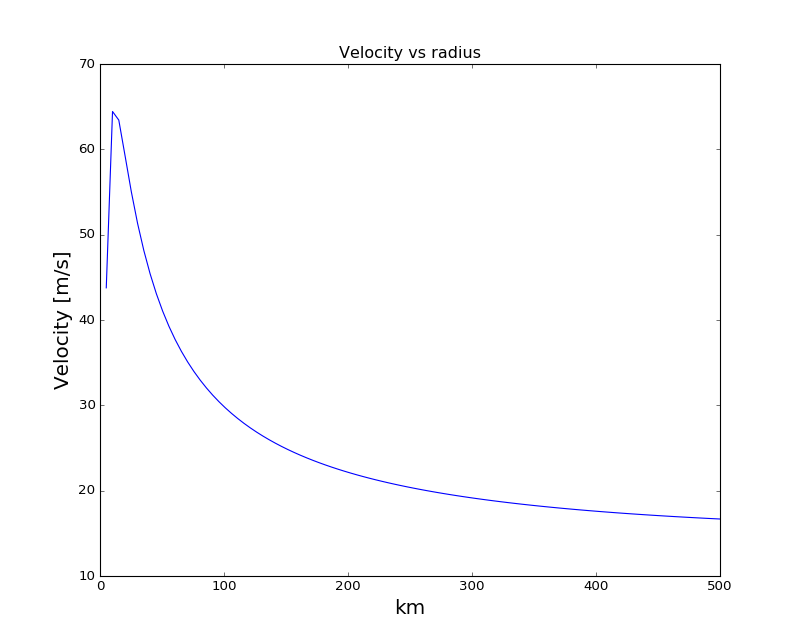

In [27]:
plt.figure(figsize=(10,8))
plt.plot(rh/1000,hvel(rh))
plt.xlabel('km',fontsize=18)
plt.ylabel('Velocity [m/s]',fontsize=18)
plt.title('Velocity vs radius')


plt.show()

<IPython.core.display.Javascript object>


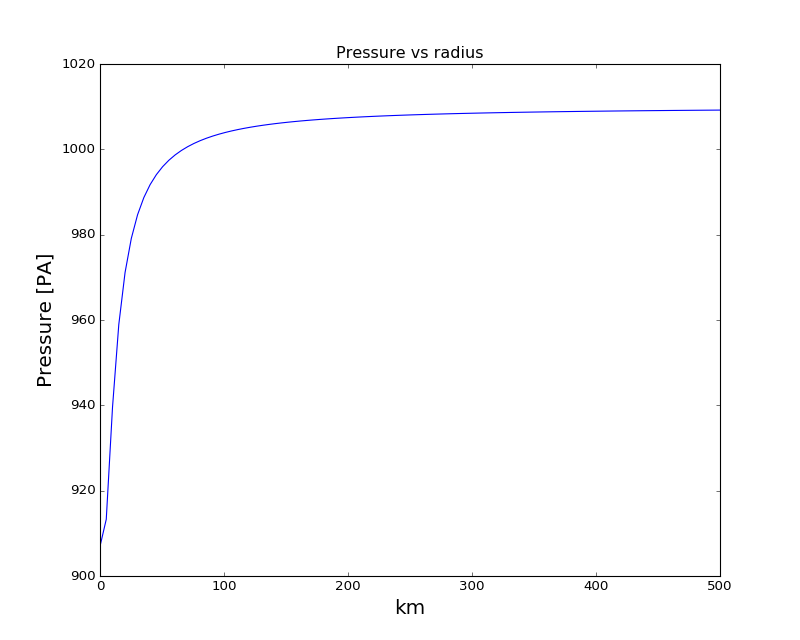

In [28]:
plt.figure(figsize=(10,8))
plt.plot(rh/1000,pres(rh)/100)

plt.xlabel('km',fontsize=18)
plt.ylabel('Pressure [PA]',fontsize=18)
plt.title('Pressure vs radius')


plt.show()

In [29]:
ni,nj=1000,1000
xl=np.linspace(-maxR, maxR,ni+1)
yl=np.linspace(-maxR, maxR,nj+1)
q1,q2=np.meshgrid(xl,yl)

In [30]:
ux,uy, zx,zy, pr=hvel2d(q1,q2,vtx,vty)

<IPython.core.display.Javascript object>


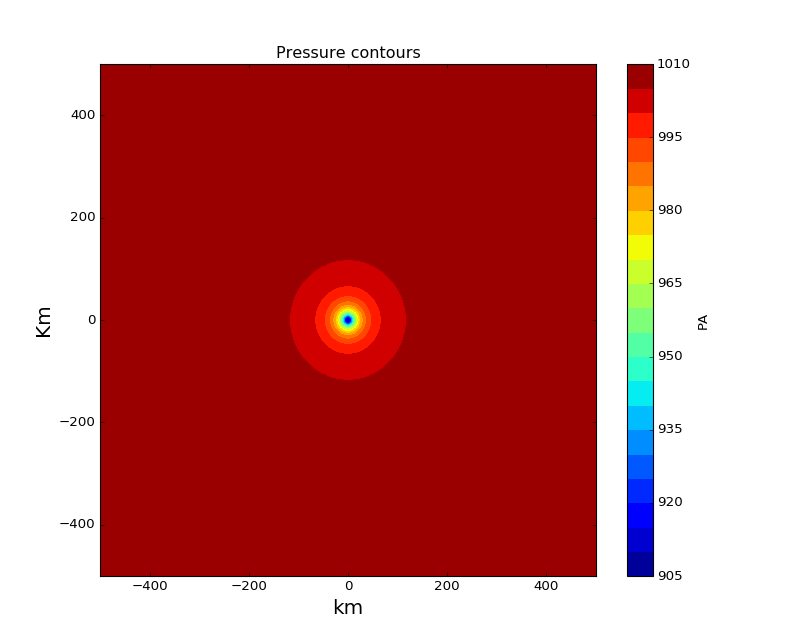

In [31]:
plt.figure(figsize=(10,8))
plt.contourf(q1/1000,q2/1000,pr/100,20)
plt.xlabel('km',fontsize=18)
plt.ylabel('Km',fontsize=18)
plt.title('Pressure contours')


plt.colorbar(label='PA')
plt.show()

<IPython.core.display.Javascript object>


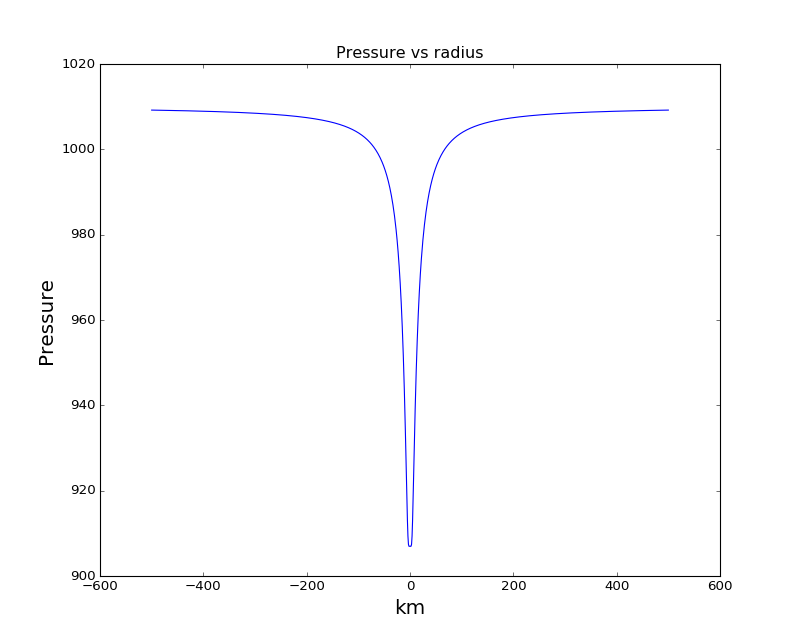

In [32]:
plt.figure(figsize=(10,8))
plt.plot(q1[0,:]/1000,pr[500,:]/100)

plt.xlabel('km',fontsize=18)
plt.ylabel('Pressure',fontsize=18)
plt.title('Pressure vs radius')


plt.show()

In [33]:
utot=np.sqrt(ux**2+uy**2) # without translational velocity
vel=np.sqrt(zx**2+zy**2)# with translational velocity

In [34]:
vel

array([[ 15.70401459,  15.70589622,  15.70778229, ...,  15.72972468,
         15.72783263,  15.72594493],
       [ 15.70591367,  15.70780352,  15.70969783, ...,  15.73169041,
         15.72979001,  15.72789398],
       [ 15.70781725,  15.70971535,  15.71161793, ...,  15.73366082,
         15.73175204,  15.72984765],
       ..., 
       [ 15.74713659,  15.74912463,  15.75111736, ...,  15.77310506,
         15.77110626,  15.76911206],
       [ 15.74522234,  15.74720193,  15.74918619, ...,  15.77112371,
         15.7691335 ,  15.76714785],
       [ 15.74331244,  15.74528362,  15.74725942, ...,  15.76914688,
         15.76716523,  15.76518812]])

<IPython.core.display.Javascript object>


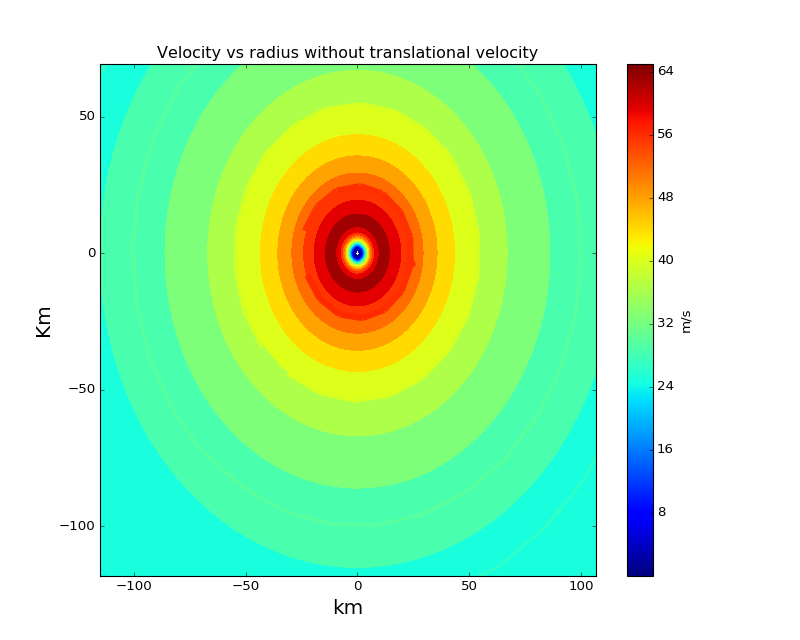

In [35]:
plt.figure(figsize=(10,8))
plt.contourf(q1/1000,q2/1000,utot,20)
plt.streamplot(q1/1000,q2/1000,ux,uy, color=utot, linewidth=0.1*utot)
plt.xlabel('km',fontsize=18)
plt.ylabel('Km',fontsize=18)
plt.title('Velocity vs radius without translational velocity')

plt.colorbar(label='m/s')
plt.show()

<IPython.core.display.Javascript object>


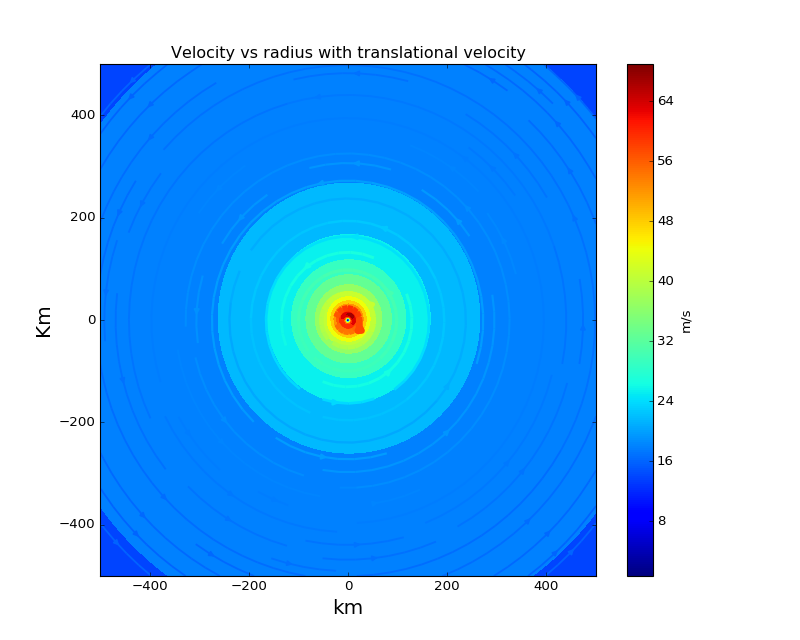

In [36]:
plt.figure(figsize=(10,8))
plt.contourf(q1/1000,q2/1000,vel,20)
plt.streamplot(q1/1000,q2/1000,zx,zy, color=vel, linewidth=0.1*vel)
plt.xlabel('km',fontsize=18)
plt.ylabel('Km',fontsize=18)
plt.title('Velocity vs radius with translational velocity')

plt.colorbar(label='m/s')
plt.show()

<IPython.core.display.Javascript object>


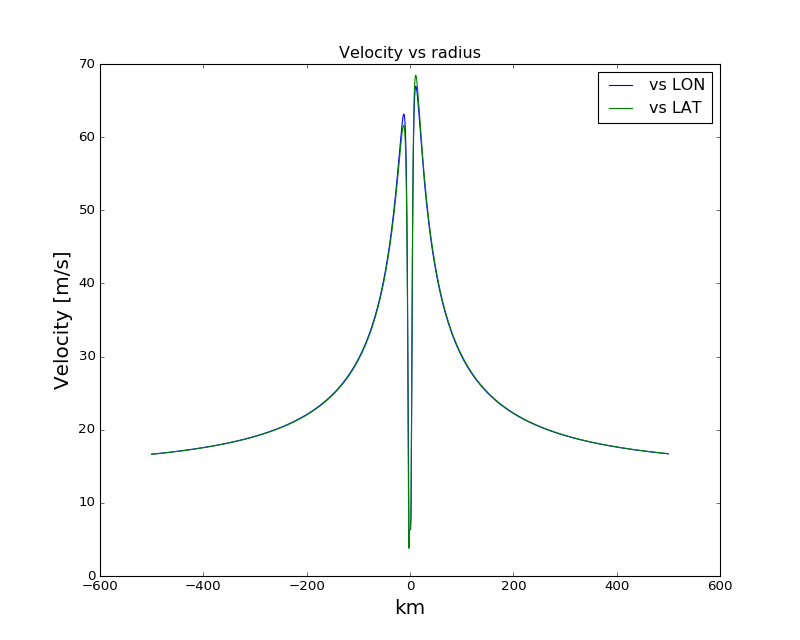

In [37]:
plt.figure(figsize=(10,8))
plt.plot(q1[0,:]/1000,vel[ni/2,:],label='vs LON')
plt.plot(q2[:,0]/1000,vel[:,nj/2],label='vs LAT')

plt.xlabel('km',fontsize=18)
plt.ylabel('Velocity [m/s]',fontsize=18)
plt.title('Velocity vs radius')


plt.legend(loc=0)
plt.show()

In [38]:
np.savetxt('tmp/phol',[q1[0,:],pr[500,:]])
np.savetxt('tmp/uhol',[q1[0,:],vel[ni/2,:],vel[:,nj/2]])

In [39]:
pandas.DataFrame({'Min Pressure':[pch/100],'Max Velocity':[vmaxh]})

,Max Velocity,Min Pressure
0,77.16,906.96
